In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
!conda install scikit-learn

scikit-learn                      0.23.2
You should consider upgrading via the '/Users/syahrulhamdani/.pyenv/versions/3.7.7/envs/PYTN/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)

[ 5 15 25 35 45 55]
[ 5 20 14 32 22 38]


In [7]:
x.reshape(-1, 1)
# f(x) = w1x1 + w0
# f(x) = w1x1 + w2x2

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [13]:
print(np.array([[5, 10], [15, 20], [25, 30]]))   # X -> input
print(np.array([5, 20, 14])) # y -> target

[[ 5 10]
 [15 20]
 [25 30]]
[ 5 20 14]


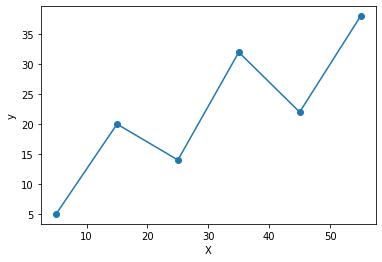

In [10]:
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [14]:
# define model
model = LinearRegression()

In [15]:
model

LinearRegression()

In [16]:
# train linear regression model
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [17]:
model.coef_, model.intercept_

(array([0.54]), 5.633333333333329)

In [18]:
lr_score = model.score(x.reshape(-1, 1), y)
print('R-squared:', lr_score)

R-squared: 0.7158756137479542


In [29]:
y_hat = model.predict(x.reshape(-1, 1))
print("input:", x)
print("target:", y)
print("prediction:", y_hat)

input: [ 5 15 25 35 45 55]
target: [ 5 20 14 32 22 38]
prediction: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


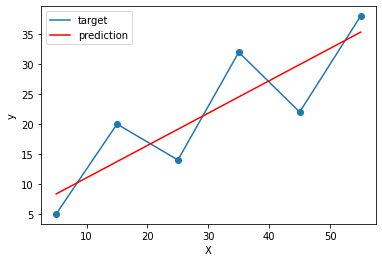

In [26]:
plt.plot(x, y, label="target")
plt.plot(x, y_hat, label="prediction", c="r")
plt.scatter(x, y)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [33]:
print(model.coef_, model.intercept_)
# y_hat = w1x1 + w0 = model.coef_*x + model.intercept_
# y_hat = bias + weight * x

[0.54] 5.633333333333329


In [34]:
# input 0
model.predict([[0]])

array([5.63333333])

## Multiple Linear Regression

In [37]:
x = np.array([
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


r-squared: 0.8615939258756775


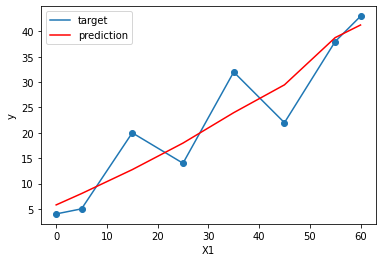

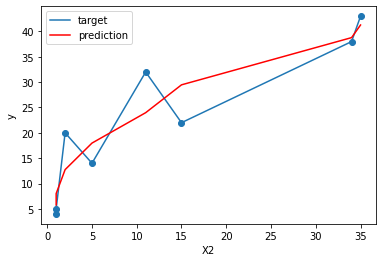

In [41]:
# define model
model = LinearRegression()

# fit model
model.fit(x, y)

# evaluate model
r2 = model.score(x, y)
print("r-squared:", r2)

# predict
y_hat = model.predict(x)

# plot
plt.plot(x[:, 0], y, label="target")
plt.plot(x[:, 0], y_hat, label="prediction", c="r")
plt.scatter(x[:, 0], y)

plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

plt.plot(x[:, 1], y, label="target")
plt.plot(x[:, 1], y_hat, label="prediction", c="r")
plt.scatter(x[:, 1], y)

plt.xlabel("X2")
plt.ylabel("y")
plt.legend()
plt.show()

In [42]:
print("model weights:", model.coef_)
print("model bias:", model.intercept_)

model weights: [0.44706965 0.25502548]
model bias: 5.52257927519819


In [44]:
model.predict([[0, 1]]), model.predict([[1, 0]])

(array([5.77760476]), array([5.96964892]))

## Polynomial Regression

In [46]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([15, 11, 2, 8, 25, 32])

print(x)
print(y)

[ 5 15 25 35 45 55]
[15 11  2  8 25 32]


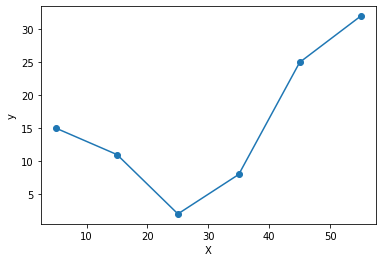

In [48]:
plt.plot(x, y)
plt.scatter(x, y)

plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [49]:
polynom = PolynomialFeatures(degree=2, include_bias=False)
polynom

PolynomialFeatures(include_bias=False)

In [50]:
polynom.fit(x.reshape(-1, 1))

PolynomialFeatures(include_bias=False)

In [52]:
poly_X = polynom.transform(x.reshape(-1, 1))

In [55]:
print(x.reshape(-1, 1))
print(poly_X)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


r2 score: 0.8908516262498563
coef: [-1.32357143  0.02839286]
intercept: 21.37232142857144


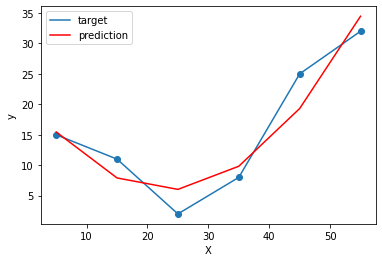

In [62]:
model = LinearRegression()
model.fit(poly_X, y)

r2 = model.score(poly_X, y)
print("r2 score:", r2)
print("coef:", model.coef_)
print("intercept:", model.intercept_)

y_hat = model.predict(poly_X)

plt.plot(x, y, label='target')
plt.plot(x, y_hat, label="prediction", c="r")
plt.scatter(x, y)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Linear Regression with `statsmodels`

In [64]:
x = np.array([
    [0, 1],
    [5, 1],
    [15, 2],
    [25, 5],
    [35, 11],
    [45, 15],
    [55, 34],
    [60, 35]
])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [65]:
x = sm.add_constant(x)
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [66]:
model = sm.OLS(y, x)

In [67]:
model

In [68]:
results = model.fit()

In [69]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 27 Oct 2020   Prob (F-statistic):            0.00713
Time:                        21:44:40   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/syahrulhamdani/.pyenv/versions/3.7.7/envs/PYTN/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [72]:
data = load_boston()
type(data)

sklearn.utils.Bunch

In [85]:
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

display(df.head())
display(target.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [86]:
lr = LinearRegression()
lr.fit(df, target)

predictions = lr.predict(df)
target['prediction'] = predictions

display(target.head(10))

print("r2 score:", lr.score(df, target["MEDV"]))

,MEDV,prediction
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
5,28.7,25.256284
6,22.9,23.001808
7,27.1,19.535988
8,16.5,11.523637
9,18.9,18.920262


r2 score: 0.7406426641094095
